# House price prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Delhi house data.csv")
data

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [3]:
data.shape

(1259, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [5]:
data.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


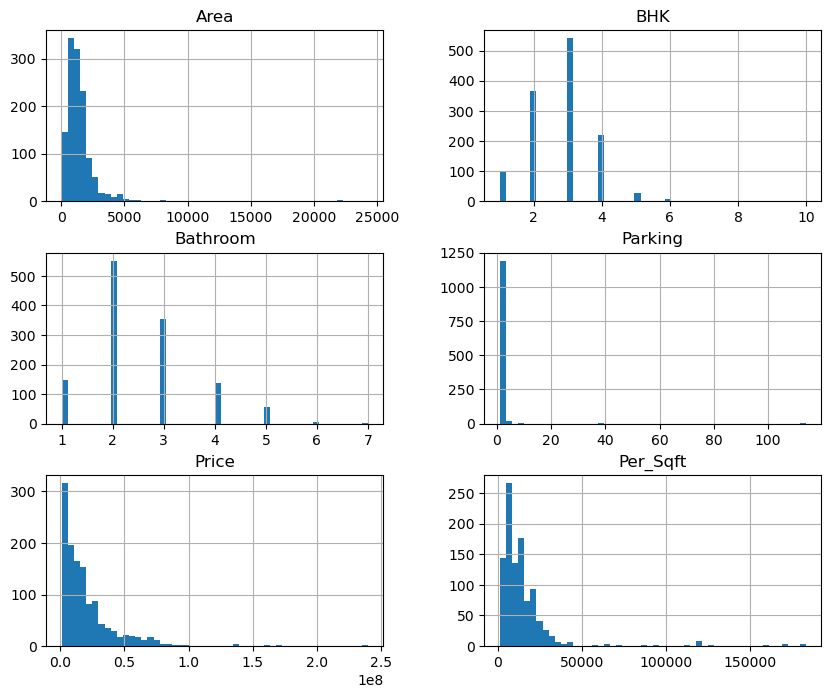

In [6]:
data.hist(bins=50, figsize=(10, 8))
plt.show()

In [7]:
for column in data.columns:
    print(data[column].value_counts())
    print("*"*20)

900.0      67
1500.0     50
1800.0     48
1000.0     42
1600.0     38
           ..
150.0       1
3250.0      1
4000.0      1
5500.0      1
11050.0     1
Name: Area, Length: 315, dtype: int64
********************
3     541
2     367
4     220
1      96
5      27
6       6
7       1
10      1
Name: BHK, dtype: int64
********************
2.0    551
3.0    355
1.0    146
4.0    138
5.0     57
6.0      7
7.0      3
Name: Bathroom, dtype: int64
********************
Semi-Furnished    708
Unfurnished       363
Furnished         183
Name: Furnishing, dtype: int64
********************
Lajpat Nagar 3                                                                                                                                                                                                                                                                                                                                                                                                                   

In [8]:
# check missing values. 

data.isna().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [9]:
# fill all missing values. 

data_fill_na = data['Bathroom'].fillna(data['Bathroom'].mean(),inplace=True)
print(data_fill_na)

None


In [10]:
data.isna().sum()

Area             0
BHK              0
Bathroom         0
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [11]:
data_fill_na = data['Furnishing'].fillna(data['Furnishing'].mode()[0],inplace=True)
print(data_fill_na)

None


In [12]:
data.isna().sum()

Area             0
BHK              0
Bathroom         0
Furnishing       0
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [13]:
data_fill_na = data['Parking'].fillna(data['Parking'].mean(),inplace=True)
print(data_fill_na)

None


In [14]:
data.isna().sum()

Area             0
BHK              0
Bathroom         0
Furnishing       0
Locality         0
Parking          0
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [15]:
data_fill_na = data['Parking'].fillna(data['Parking'].mode()[0],inplace=True)
print(data_fill_na)

None


In [16]:
data.isna().sum()

Area             0
BHK              0
Bathroom         0
Furnishing       0
Locality         0
Parking          0
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [17]:
data_fill_na = data['Type'].fillna(data['Type'].mode()[0],inplace=True)

print(data_fill_na)

None


In [18]:
data.isna().sum()

Area             0
BHK              0
Bathroom         0
Furnishing       0
Locality         0
Parking          0
Price            0
Status           0
Transaction      0
Type             0
Per_Sqft       241
dtype: int64

In [19]:
data_fill_na = data['Per_Sqft'].fillna(data['Per_Sqft'].mean(),inplace=True)

print(data_fill_na)

None


In [20]:
data.isna().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [21]:
data

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,15690.136542
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.000000
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.000000
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.000000
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.000000
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.000000
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.000000
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.000000
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.000000


In [22]:
# all missing values is filled.

data.isna().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [23]:
data = pd.DataFrame(data)
data

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,15690.136542
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.000000
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.000000
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.000000
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.000000
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.000000
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.000000
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.000000
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.000000


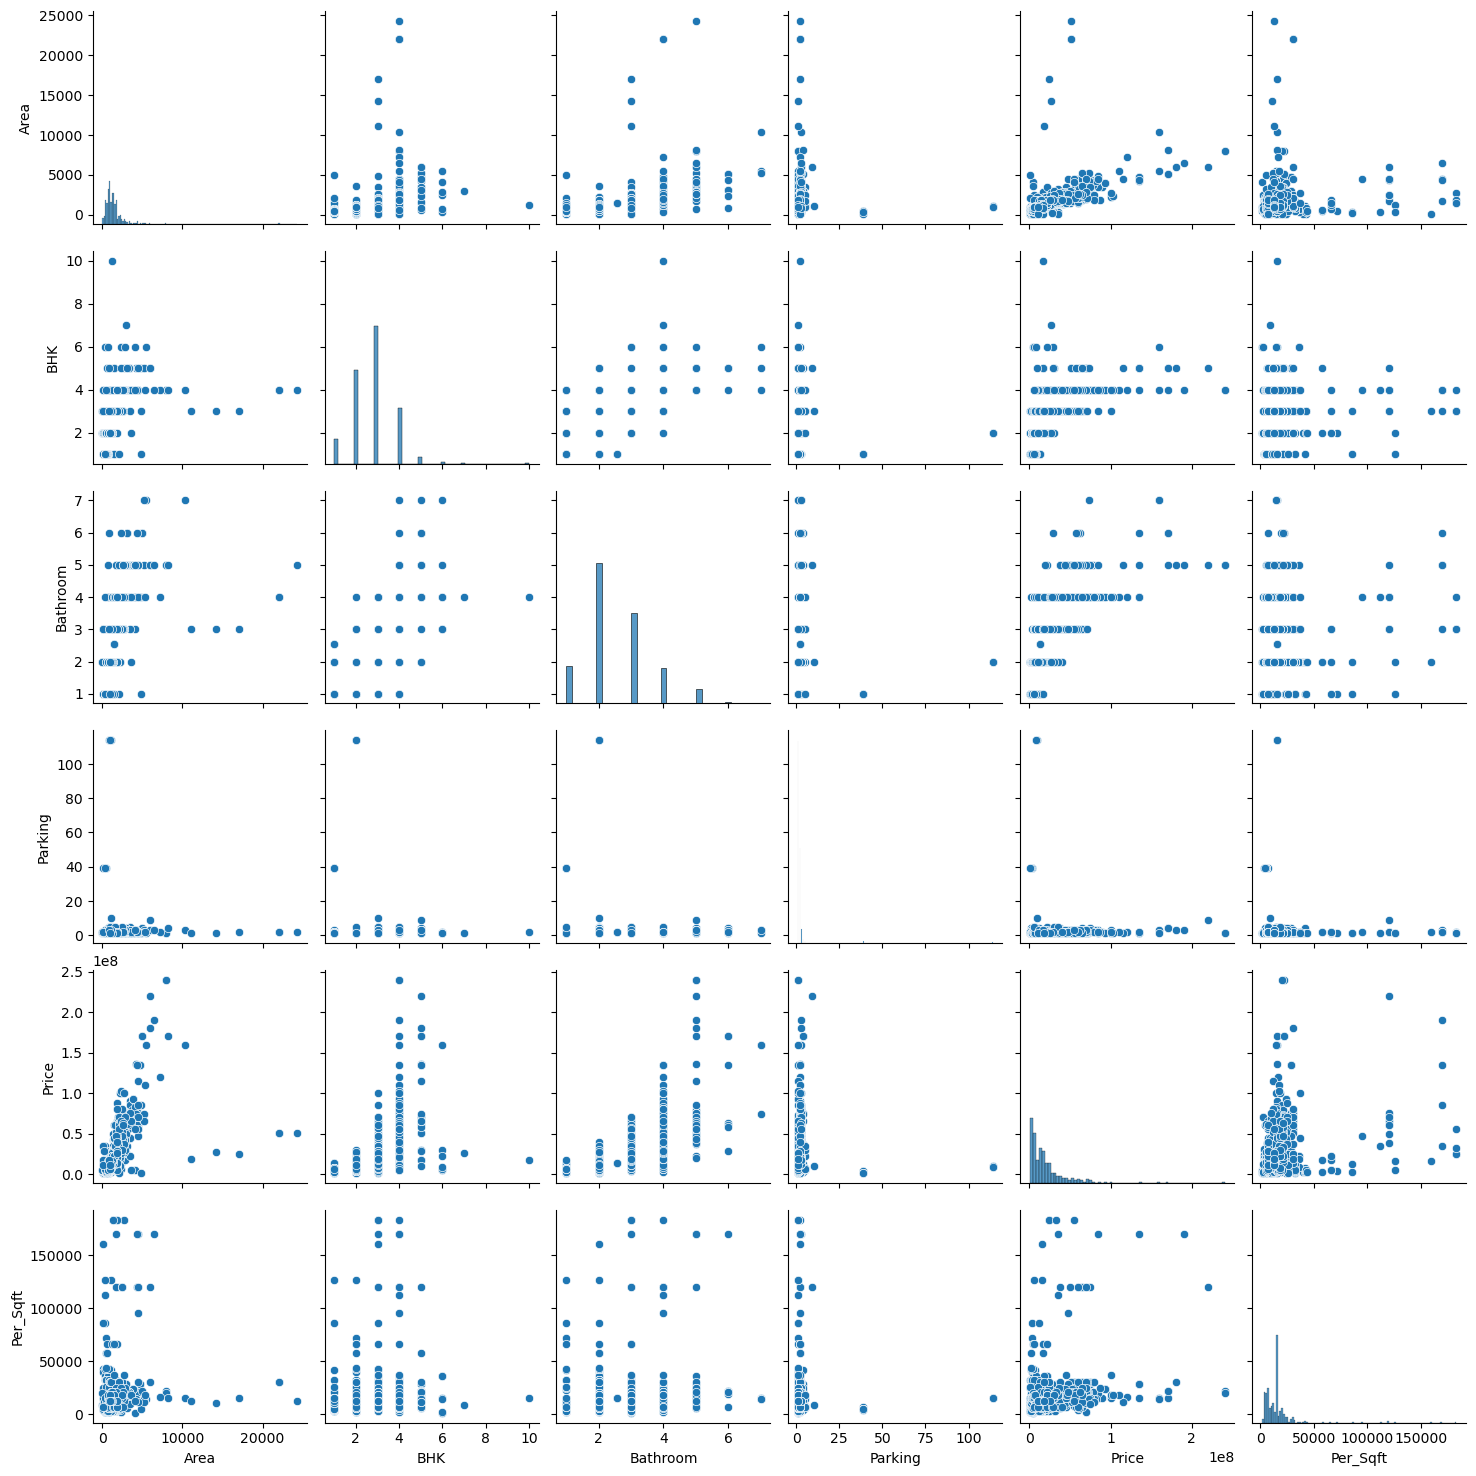

In [24]:
sns.pairplot(data)

# Correlation Matrix

In [25]:
# correlation matrix

data.corr()

/var/folders/vz/qkwbtk057c5bs6dyj_w4d8f80000gn/T/ipykernel_9316/3849051830.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Area,BHK,Bathroom,Parking,Price,Per_Sqft
Area,1.000000,0.449438,0.535104,-0.009266,0.580836,0.160678
BHK,0.449438,1.000000,0.771083,-0.069320,0.571523,0.165145
Bathroom,0.535104,0.771083,1.000000,-0.032294,0.728054,0.206706
Parking,-0.009266,-0.069320,-0.032294,1.000000,-0.000446,0.000786
Price,0.580836,0.571523,0.728054,-0.000446,1.000000,0.313061
Per_Sqft,0.160678,0.165145,0.206706,0.000786,0.313061,1.000000


/var/folders/vz/qkwbtk057c5bs6dyj_w4d8f80000gn/T/ipykernel_9316/496284037.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

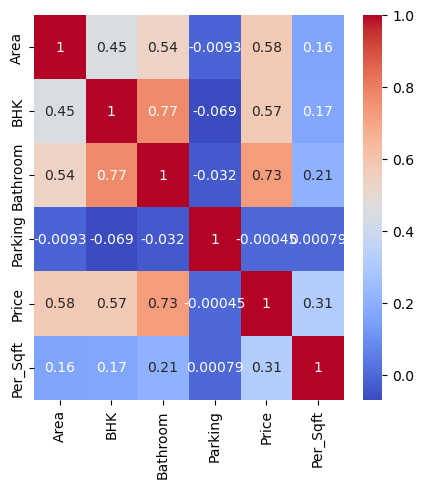

In [26]:
# display heatmap

corr = data.corr()
fig,ax = plt.subplots(figsize =(5,5))
sns.heatmap(corr,annot = True, ax = ax, cmap = 'coolwarm')

In [27]:
# using custom Encoder

val_1 = data["Furnishing"].unique()[0]
val_2 = data["Furnishing"].unique()[1]
val_3 = data["Furnishing"].unique()[2]


data["Furnishing"] = data["Furnishing"].map({val_1 : 0,val_2:1,val_3:2})
print(data["Furnishing"])
data.head()

0       0
1       0
2       1
3       0
4       0
       ..
1254    2
1255    0
1256    0
1257    2
1258    2
Name: Furnishing, Length: 1259, dtype: int64


,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,0,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,15690.136542
1,750.0,2,2.0,0,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.000000
2,950.0,2,2.0,1,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.000000
3,600.0,2,2.0,0,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.000000
4,650.0,2,2.0,0,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.000000


In [28]:
val_1 = data["Transaction"].unique()[0]
val_2 = data["Transaction"].unique()[1]



data["Transaction"] = data["Transaction"].map({val_1 : 0,val_2:1,val_3:2})
print(data["Transaction"])
data.head()

0       0
1       0
2       1
3       1
4       0
       ..
1254    0
1255    1
1256    0
1257    1
1258    0
Name: Transaction, Length: 1259, dtype: int64


,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,0,Rohini Sector 25,1.0,6500000,Ready_to_move,0,Builder_Floor,15690.136542
1,750.0,2,2.0,0,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,0,Apartment,6667.000000
2,950.0,2,2.0,1,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,1,Apartment,6667.000000
3,600.0,2,2.0,0,Rohini Sector 24,1.0,4200000,Ready_to_move,1,Builder_Floor,6667.000000
4,650.0,2,2.0,0,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,0,Builder_Floor,6667.000000


In [29]:
val_1 = data["Type"].unique()[0]
val_2 = data["Type"].unique()[1]



data["Type"] = data["Type"].map({val_1 : 0,val_2:1,val_3:2})
print(data["Type"])
data.head()

0       0
1       1
2       1
3       0
4       0
       ..
1254    0
1255    0
1256    0
1257    0
1258    0
Name: Type, Length: 1259, dtype: int64


,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,0,Rohini Sector 25,1.0,6500000,Ready_to_move,0,0,15690.136542
1,750.0,2,2.0,0,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,0,1,6667.000000
2,950.0,2,2.0,1,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,1,1,6667.000000
3,600.0,2,2.0,0,Rohini Sector 24,1.0,4200000,Ready_to_move,1,0,6667.000000
4,650.0,2,2.0,0,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,0,0,6667.000000


In [30]:
# feature datasets.


x = data.drop(columns = ['Price','Status','Locality'])
x

,Area,BHK,Bathroom,Furnishing,Parking,Transaction,Type,Per_Sqft
0,800.0,3,2.0,0,1.0,0,0,15690.136542
1,750.0,2,2.0,0,1.0,0,1,6667.000000
2,950.0,2,2.0,1,1.0,1,1,6667.000000
3,600.0,2,2.0,0,1.0,1,0,6667.000000
4,650.0,2,2.0,0,1.0,0,0,6667.000000
...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,2,3.0,0,0,12916.000000
1255,1050.0,3,2.0,0,3.0,1,0,12916.000000
1256,875.0,3,3.0,0,3.0,0,0,12916.000000
1257,990.0,2,2.0,2,1.0,1,0,12916.000000


In [31]:
# target dataset.

y = data[['Price']]
y

,Price
0,6500000
1,5000000
2,15500000
3,4200000
4,6200000
...,...
1254,55000000
1255,12500000
1256,17500000
1257,11500000


In [32]:
# spliting train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
data

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,0,Rohini Sector 25,1.0,6500000,Ready_to_move,0,0,15690.136542
1,750.0,2,2.0,0,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,0,1,6667.000000
2,950.0,2,2.0,1,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,1,1,6667.000000
3,600.0,2,2.0,0,Rohini Sector 24,1.0,4200000,Ready_to_move,1,0,6667.000000
4,650.0,2,2.0,0,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,0,0,6667.000000
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,2,Chittaranjan Park,3.0,55000000,Ready_to_move,0,0,12916.000000
1255,1050.0,3,2.0,0,Chittaranjan Park,3.0,12500000,Ready_to_move,1,0,12916.000000
1256,875.0,3,3.0,0,Chittaranjan Park,3.0,17500000,Ready_to_move,0,0,12916.000000
1257,990.0,2,2.0,2,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,1,0,12916.000000


# Algorithm

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [34]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)



In [35]:
# use mean_absolute_percentage_error

from sklearn.metrics import mean_absolute_percentage_error

print(mean_absolute_percentage_error(y_test, y_pred))

1.1388550731084803


In [36]:
df=({'Actual':y_test, 'Predicted':y_pred})
df

{'Actual':          Price
 80    11400000
 531    6200000
 638   15800000
 1022  39700000
 547   23000000
 ...        ...
 26     7000000
 1014   7000000
 481   93000000
 218    5890000
 726   17800000
 
 [378 rows x 1 columns],
 'Predicted': array([[ 9.92329354e+06],
        [-3.11269102e+06],
        [ 1.11730137e+07],
        [ 4.53417853e+07],
        [ 2.96258601e+07],
        [-9.13749758e+06],
        [ 4.82356188e+07],
        [ 2.63135584e+07],
        [ 6.49154562e+06],
        [ 2.78016306e+07],
        [ 2.62460428e+07],
        [-4.87824351e+06],
        [-9.21255615e+06],
        [ 2.93574826e+07],
        [ 1.27510398e+07],
        [ 1.05395924e+07],
        [ 9.90438568e+06],
        [ 8.54980655e+06],
        [ 4.26897966e+07],
        [ 3.10064493e+07],
        [ 9.40137840e+06],
        [ 7.02536725e+07],
        [ 2.93915228e+07],
        [ 4.43122638e+07],
        [ 7.17615795e+06],
        [ 1.14366530e+07],
        [ 9.88734089e+06],
        [ 1.23515367e+07],
  

/var/folders/vz/qkwbtk057c5bs6dyj_w4d8f80000gn/T/ipykernel_9316/3786429423.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y, hist=False, color="r",label="Actual Value")
/var/folders/vz/qkwbtk057c5bs6dyj_w4d8f80000gn/T/ipykernel_9316/3786429423.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

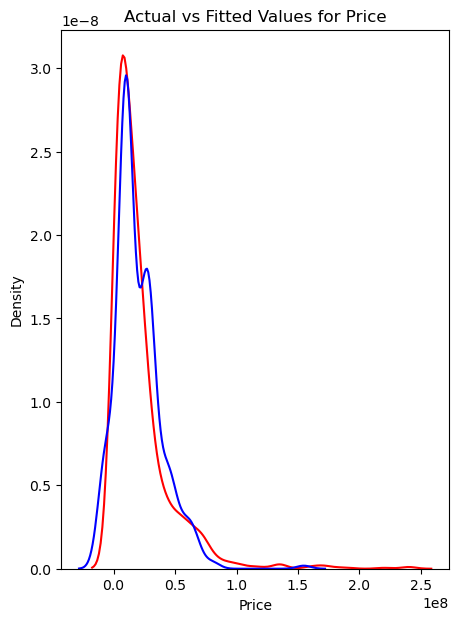

1.1388550731084803


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have 'y' (actual values) and 'y_pred' (predicted values)
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r",label="Actual Value")
sns.distplot(y_pred, hist=False, color="b",kde=True, label="Fitted Values",ax=ax)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Density')

plt.show()

print(mean_absolute_percentage_error(y_test, y_pred))

In [38]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
 
model = svm.SVR()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

/Users/akashkumarsinha/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test, y_pred))

1.5337582576098272


In [40]:
df=({'Actual':y_test, 'Predicted':y_pred})
df

{'Actual':          Price
 80    11400000
 531    6200000
 638   15800000
 1022  39700000
 547   23000000
 ...        ...
 26     7000000
 1014   7000000
 481   93000000
 218    5890000
 726   17800000
 
 [378 rows x 1 columns],
 'Predicted': array([14699891.0358965 , 14699906.42816275, 14699968.23087776,
        14699962.50857702, 14700027.48253729, 14699896.81041985,
        14699962.85544558, 14699944.09927552, 14699893.57739094,
        14699908.4000523 , 14699968.23087822, 14699907.71323641,
        14699897.448919  , 14700014.6186166 , 14700024.77394087,
        14699903.28299135, 14699905.48722439, 14699891.57871218,
        14699962.39629453, 14699955.18672941, 14699913.39620755,
        14699966.14097396, 14699968.00177961, 14699963.73604328,
        14699905.0321315 , 14699903.78693618, 14699907.50301944,
        14700013.14167752, 14699897.57286392, 14699967.00569307,
        14700018.52171232, 14699967.7723398 , 14699967.89474625,
        14699945.5985092 , 14699915.9219997

/var/folders/vz/qkwbtk057c5bs6dyj_w4d8f80000gn/T/ipykernel_9316/2422020285.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r",label="Actual Value")
/var/folders/vz/qkwbtk057c5bs6dyj_w4d8f80000gn/T/ipykernel_9316/2422020285.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457

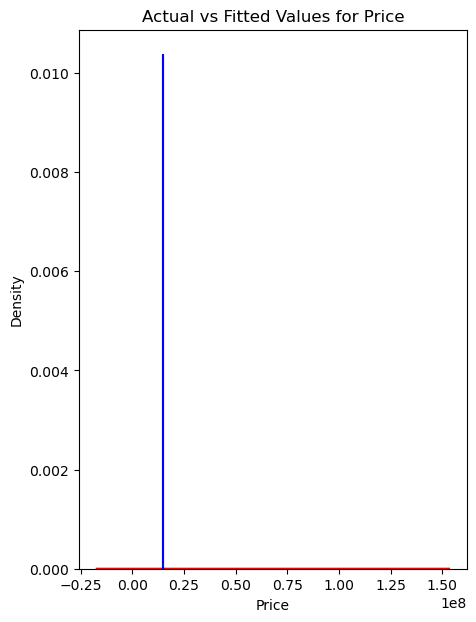

1.5337582576098272


In [41]:
# Assuming you have 'y' (actual values) and 'y_pred' (predicted values)
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r",label="Actual Value")
sns.distplot(y_pred, hist=False, color="b",kde=True, label="Fitted Values",ax=ax)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Density')

plt.show()

print(mean_absolute_percentage_error(y_test, y_pred))

In [42]:
from sklearn.ensemble import RandomForestRegressor
 
model = RandomForestRegressor(n_estimators=10)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
 
mean_absolute_percentage_error(y_test, y_pred)

/Users/akashkumarsinha/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.37241303929976877

/var/folders/vz/qkwbtk057c5bs6dyj_w4d8f80000gn/T/ipykernel_9316/1963448148.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r",label="Actual Value")
/var/folders/vz/qkwbtk057c5bs6dyj_w4d8f80000gn/T/ipykernel_9316/1963448148.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457

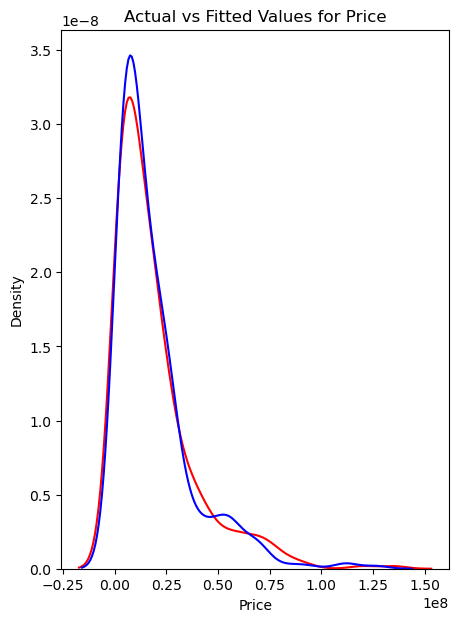

In [43]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r",label="Actual Value")
sns.distplot(y_pred, hist=False, color="b",kde=True, label="Fitted Values",ax=ax)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Density')

plt.show()